<a href="https://colab.research.google.com/github/avilaJorge/CSE253_FinalProject/blob/master/DeepFakeDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run DeepFake_Dataloader.py
%run utils.py

In [2]:
# imports pytorch
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# Numpy, Matplotlib, and PIL
import numpy as np
import matplotlib.pyplot as plt

# general imports
import pprint

# My imports
from DeepFake_Dataloader import get_dataloaders
from models import LinearRegression, save_model
from utils import RunningAverage

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
trn_dl, val_dl, tst_dl = get_dataloaders()

In [4]:
s_epoch      = 1
num_epochs   = 500
log_step     = 10e5
lr_rate      = 1e-3
best_loss    = float('inf')
prev_loss    = float('inf')
loss_inc_cnt = 0
stp_erly_cnt = 4
stop_early   = False
load_model   = False
model_name   = 'LogisticRegressionModel'

lr_model = LinearRegression(725, 1500, 250).to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=lr_rate)

if load_model:
    lr_model.load_state_dict(torch.load(''))

In [5]:
def train(model, dataloader, validation_loader):
    
    train_losses = []
    valid_losses = []
    
    # Train the models
    total_step = len(dataloader.dataset)
    for epoch in range(s_epoch, num_epochs):
        
        # create a progress bar
        progress = ProgressMonitor(length=total_step)
                                   
        train_loss = MovingAverage()
        
        for i, (x, y) in enumerate(dataloader):
            optimizer.zero_grad()

            # Move to GPU
            x = x.to(device)
            y = y.to(device)

            # Forward, backward and optimize
            pred = model(x)
            loss = criterion(pred, y)
            loss.backward()
            optimizer.step()
            loss=loss.item()
                                   
            # update average loss
            train_loss.update(loss)

            # update progress bar
            progress.update(x.shape[0], train_loss)
        
        print('Epoch: ', epoch)
        print('Training loss:', train_loss)
        train_losses.append(train_loss.value)
        evaluate(model, epoch, validation_loader, valid_losses)
        if stop_early:
            break
    
    return train_losses, valid_losses

def evaluate(model, epoch, data_loader, valid_losses, validation=True):

    global best_loss
    global prev_loss
    global loss_inc_cnt
    global stop_early
                            

    # keep track of predictions
    y_predics = []
    y_targets = []
    
    with torch.no_grad():
                            
        total_step = len(data_loader.dataset)
        
        # create a progress bar
        progress = ProgressMonitor(length=total_step)
        
        losses = RunningAverage()
        
        for i, (x, y) in enumerate(data_loader):

            # Move to GPU
            x = x.to(device)
            y = y.to(device)

            # Evaluate
            pred = model(x)
            
            loss = criterion(pred, y).item()
                            
            losses.update(loss)
            y_predics.extend((pred > 0.5).float())
            y_targets.extend(y)
            
            # update progress bar
            progress.update(x.shape[0], losses)
                            
                                   
        
        loss = losses.value
        print("Validation Loss: ", losses)
        valid_losses.append(losses.value)

        # Calculate validation accuracy
        y_pred = torch.tensor(y_predics, dtype=torch.int64)
        y_targ = torch.tensor(y_targets, dtype=torch.int64)
        accuracy = torch.mean((y_pred == y_targ).float())
        print('Validation accuracy: {:.4f}%'.format(float(accuracy) * 100))

        if validation:
            if best_loss > loss:
                best_loss = loss
                print('"Best Loss": ' + str(best_loss) + '\n')
                save_model(model, 'Best-' + model_name, dt, path)

            loss_inc_cnt = loss_inc_cnt + 1 if prev_loss < loss else 0
            if loss_inc_cnt > 2: stop_early = True
            save_model(model, model_name, dt, path)
            print("Validation Loss has gone up %d times.\n" % (loss_inc_cnt))
            prev_loss = loss
            if stop_early: 
                return loss
        
        return loss


In [6]:
train_losses, valid_losses = train(lr_model, trn_dl, val_dl)

Epoch:  1
Training loss: 0.69


Validation Loss:  0.6817
Validation accuracy: 72.4625%
"Best Loss": 0.6816674508154392

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.6806


Validation Loss:  0.678
Validation accuracy: 97.2125%
"Best Loss": 0.6779766827821732

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.6779


Validation Loss:  0.676
Validation accuracy: 74.7375%
"Best Loss": 0.6759824603796005

Validation Loss has gone up 0 times.



Epoch:  4
Training loss: 0.6747


Validation Loss:  0.6722
Validation accuracy: 97.6000%
"Best Loss": 0.6721863523125648

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.672


Validation Loss:  0.6702
Validation accuracy: 95.9125%
"Best Loss": 0.6701926738023758

Validation Loss has gone up 0 times.



Epoch:  6
Training loss: 0.6697


Validation Loss:  0.6674
Validation accuracy: 96.0250%
"Best Loss": 0.6674040704965591

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.6672


Validation Loss:  0.6667
Validation accuracy: 75.8500%
"Best Loss": 0.6666902378201485

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.6652


Validation Loss:  0.6631
Validation accuracy: 96.1750%
"Best Loss": 0.6630728840827942

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.6629


Validation Loss:  0.6599
Validation accuracy: 97.1125%
"Best Loss": 0.6598874814808369

Validation Loss has gone up 0 times.



Epoch:  10
Training loss: 0.6584


Validation Loss:  0.6572
Validation accuracy: 94.9125%
"Best Loss": 0.6571775786578655

Validation Loss has gone up 0 times.



Epoch:  11
Training loss: 0.6561


Validation Loss:  0.6495
Validation accuracy: 97.1000%
"Best Loss": 0.6494952961802483

Validation Loss has gone up 0 times.



Epoch:  12
Training loss: 0.6511


Validation Loss:  0.651
Validation accuracy: 96.9500%
Validation Loss has gone up 1 times.



Epoch:  13
Training loss: 0.6501


Validation Loss:  0.6457
Validation accuracy: 97.3750%
"Best Loss": 0.6457155644893646

Validation Loss has gone up 0 times.



Epoch:  14
Training loss: 0.6453


Validation Loss:  0.643
Validation accuracy: 98.1250%
"Best Loss": 0.6430418565869331

Validation Loss has gone up 0 times.



Epoch:  15
Training loss: 0.6439


Validation Loss:  0.6389
Validation accuracy: 97.2125%
"Best Loss": 0.6388912536203861

Validation Loss has gone up 0 times.



Epoch:  16
Training loss: 0.6376


Validation Loss:  0.6339
Validation accuracy: 97.9375%
"Best Loss": 0.6338548585772514

Validation Loss has gone up 0 times.



Epoch:  17
Training loss: 0.6345


Validation Loss:  0.6303
Validation accuracy: 97.3000%
"Best Loss": 0.6302971988916397

Validation Loss has gone up 0 times.



Epoch:  18
Training loss: 0.6299


Validation Loss:  0.6378
Validation accuracy: 92.5125%
Validation Loss has gone up 1 times.



Epoch:  19
Training loss: 0.6322


Validation Loss:  0.6208
Validation accuracy: 96.8875%
"Best Loss": 0.6207776963710785

Validation Loss has gone up 0 times.



Epoch:  20
Training loss: 0.6199


Validation Loss:  0.6207
Validation accuracy: 96.7375%
"Best Loss": 0.6206548064947128

Validation Loss has gone up 0 times.



Epoch:  21
Training loss: 0.6224


Validation Loss:  0.6138
Validation accuracy: 96.9250%
"Best Loss": 0.6137791015207767

Validation Loss has gone up 0 times.



Epoch:  22
Training loss: 0.6154


Validation Loss:  0.6087
Validation accuracy: 97.6625%
"Best Loss": 0.6086914837360382

Validation Loss has gone up 0 times.



Epoch:  23
Training loss: 0.6095


Validation Loss:  0.6071
Validation accuracy: 96.8500%
"Best Loss": 0.6070546247065066

Validation Loss has gone up 0 times.



Epoch:  24
Training loss: 0.6064


Validation Loss:  0.6031
Validation accuracy: 93.7875%
"Best Loss": 0.6030888371169567

Validation Loss has gone up 0 times.



Epoch:  25
Training loss: 0.6054


Validation Loss:  0.5932
Validation accuracy: 96.3125%
"Best Loss": 0.5931674391031265

Validation Loss has gone up 0 times.



Epoch:  26
Training loss: 0.5933


Validation Loss:  0.597
Validation accuracy: 92.8875%
Validation Loss has gone up 1 times.



Epoch:  27
Training loss: 0.5966


Validation Loss:  0.5885
Validation accuracy: 96.9750%
"Best Loss": 0.5884986855089664

Validation Loss has gone up 0 times.



Epoch:  28
Training loss: 0.5896


Validation Loss:  0.583
Validation accuracy: 97.7625%
"Best Loss": 0.5829918198287487

Validation Loss has gone up 0 times.



Epoch:  29
Training loss: 0.5821


Validation Loss:  0.6023
Validation accuracy: 87.9875%
Validation Loss has gone up 1 times.



Epoch:  30
Training loss: 0.5962


Validation Loss:  0.5774
Validation accuracy: 96.7375%
"Best Loss": 0.5773835480213165

Validation Loss has gone up 0 times.



Epoch:  31
Training loss: 0.5796


Validation Loss:  0.5669
Validation accuracy: 97.7375%
"Best Loss": 0.5668670274317265

Validation Loss has gone up 0 times.



Epoch:  32
Training loss: 0.5654


Validation Loss:  0.571
Validation accuracy: 95.3500%
Validation Loss has gone up 1 times.



Epoch:  33
Training loss: 0.5718


Validation Loss:  0.5578
Validation accuracy: 98.0500%
"Best Loss": 0.5578147768974304

Validation Loss has gone up 0 times.



Epoch:  34
Training loss: 0.563


Validation Loss:  0.5579
Validation accuracy: 97.4625%
Validation Loss has gone up 1 times.



Epoch:  35
Training loss: 0.5628


Validation Loss:  0.5533
Validation accuracy: 96.7625%
"Best Loss": 0.5533257126808167

Validation Loss has gone up 0 times.



Epoch:  36
Training loss: 0.5546


Validation Loss:  0.5502
Validation accuracy: 95.9625%
"Best Loss": 0.550211600959301

Validation Loss has gone up 0 times.



Epoch:  37
Training loss: 0.5504


Validation Loss:  0.5417
Validation accuracy: 97.9000%
"Best Loss": 0.5417055785655976

Validation Loss has gone up 0 times.



Epoch:  38
Training loss: 0.5417


Validation Loss:  0.5369
Validation accuracy: 97.8125%
"Best Loss": 0.5369181483983994

Validation Loss has gone up 0 times.



Epoch:  39
Training loss: 0.5385


Validation Loss:  0.5352
Validation accuracy: 97.9125%
"Best Loss": 0.5352153964340687

Validation Loss has gone up 0 times.



Epoch:  40
Training loss: 0.5361


Validation Loss:  0.5349
Validation accuracy: 97.6750%
"Best Loss": 0.5348772928118706

Validation Loss has gone up 0 times.



Epoch:  41
Training loss: 0.5335


Validation Loss:  0.5529
Validation accuracy: 91.7875%
Validation Loss has gone up 1 times.



Epoch:  42
Training loss: 0.5487


Validation Loss:  0.5205
Validation accuracy: 97.7125%
"Best Loss": 0.5205423943698406

Validation Loss has gone up 0 times.



Epoch:  43
Training loss: 0.5213


Validation Loss:  0.5141
Validation accuracy: 97.6750%
"Best Loss": 0.5141438320279123

Validation Loss has gone up 0 times.



Epoch:  44
Training loss: 0.5168


Validation Loss:  0.5405
Validation accuracy: 97.3000%
Validation Loss has gone up 1 times.



Epoch:  45
Training loss: 0.5355


Validation Loss:  0.5046
Validation accuracy: 97.7250%
"Best Loss": 0.504624929279089

Validation Loss has gone up 0 times.



Epoch:  46
Training loss: 0.5121


Validation Loss:  0.5056
Validation accuracy: 97.8875%
Validation Loss has gone up 1 times.



Epoch:  47
Training loss: 0.5169


Validation Loss:  0.5342
Validation accuracy: 92.7625%
Validation Loss has gone up 2 times.



Epoch:  48
Training loss: 0.5314


Validation Loss:  0.508
Validation accuracy: 97.3500%
Validation Loss has gone up 0 times.



Epoch:  49
Training loss: 0.5055


Validation Loss:  0.4897
Validation accuracy: 98.1750%
"Best Loss": 0.4896808620542288

Validation Loss has gone up 0 times.



Epoch:  50
Training loss: 0.4897


Validation Loss:  0.4848
Validation accuracy: 97.5875%
"Best Loss": 0.48481164313852787

Validation Loss has gone up 0 times.



Epoch:  51
Training loss: 0.4818


Validation Loss:  0.5354
Validation accuracy: 89.0125%
Validation Loss has gone up 1 times.



Epoch:  52
Training loss: 0.5219


Validation Loss:  0.4854
Validation accuracy: 96.4250%
Validation Loss has gone up 0 times.



Epoch:  53
Training loss: 0.4835


Validation Loss:  0.5172
Validation accuracy: 94.9625%
Validation Loss has gone up 1 times.



Epoch:  54
Training loss: 0.4989


Validation Loss:  0.5012
Validation accuracy: 93.2250%
Validation Loss has gone up 0 times.



Epoch:  55
Training loss: 0.5017


Validation Loss:  0.4656
Validation accuracy: 97.5875%
"Best Loss": 0.4656176455318928

Validation Loss has gone up 0 times.



Epoch:  56
Training loss: 0.4696


Validation Loss:  0.4598
Validation accuracy: 97.9125%
"Best Loss": 0.4598058443516493

Validation Loss has gone up 0 times.



Epoch:  57
Training loss: 0.4693


Validation Loss:  0.4716
Validation accuracy: 98.2000%
Validation Loss has gone up 1 times.



Epoch:  58
Training loss: 0.4722


Validation Loss:  0.4534
Validation accuracy: 98.1250%
"Best Loss": 0.4534422233700752

Validation Loss has gone up 0 times.



Epoch:  59
Training loss: 0.4588


Validation Loss:  0.4494
Validation accuracy: 98.1500%
"Best Loss": 0.4494159575551748

Validation Loss has gone up 0 times.



Epoch:  60
Training loss: 0.4508


Validation Loss:  0.4657
Validation accuracy: 95.1750%
Validation Loss has gone up 1 times.



Epoch:  61
Training loss: 0.4675


Validation Loss:  0.4424
Validation accuracy: 97.5625%
"Best Loss": 0.4423595815896988

Validation Loss has gone up 0 times.



Epoch:  62
Training loss: 0.4503


Validation Loss:  0.4373
Validation accuracy: 98.2250%
"Best Loss": 0.43734103441238403

Validation Loss has gone up 0 times.



Epoch:  63
Training loss: 0.4353


Validation Loss:  0.4362
Validation accuracy: 97.6375%
"Best Loss": 0.4362086523324251

Validation Loss has gone up 0 times.



Epoch:  64
Training loss: 0.4396


Validation Loss:  0.4381
Validation accuracy: 96.9750%
Validation Loss has gone up 1 times.



Epoch:  65
Training loss: 0.4485


Validation Loss:  0.4614
Validation accuracy: 97.8500%
Validation Loss has gone up 2 times.



Epoch:  66
Training loss: 0.4489


Validation Loss:  0.42
Validation accuracy: 98.3000%
"Best Loss": 0.41997895017266273

Validation Loss has gone up 0 times.



Epoch:  67
Training loss: 0.431


Validation Loss:  0.4297
Validation accuracy: 96.2375%
Validation Loss has gone up 1 times.



Epoch:  68
Training loss: 0.4327


Validation Loss:  0.4132
Validation accuracy: 97.9375%
"Best Loss": 0.41324604116380215

Validation Loss has gone up 0 times.



Epoch:  69
Training loss: 0.4195


Validation Loss:  0.4079
Validation accuracy: 98.1500%
"Best Loss": 0.4079429227858782

Validation Loss has gone up 0 times.



Epoch:  70
Training loss: 0.4119


Validation Loss:  0.4092
Validation accuracy: 97.7625%
Validation Loss has gone up 1 times.



Epoch:  71
Training loss: 0.4092


Validation Loss:  0.4051
Validation accuracy: 97.9250%
"Best Loss": 0.4051328971982002

Validation Loss has gone up 0 times.



Epoch:  72
Training loss: 0.4046


Validation Loss:  0.5356
Validation accuracy: 96.1625%
Validation Loss has gone up 1 times.



Epoch:  73
Training loss: 0.5005


Validation Loss:  0.4052
Validation accuracy: 97.9125%
Validation Loss has gone up 0 times.



Epoch:  74
Training loss: 0.4103


Validation Loss:  0.4042
Validation accuracy: 98.3500%
"Best Loss": 0.4041560087352991

Validation Loss has gone up 0 times.



Epoch:  75
Training loss: 0.4158


Validation Loss:  0.5804
Validation accuracy: 66.8875%
Validation Loss has gone up 1 times.



Epoch:  76
Training loss: 0.5097


Validation Loss:  0.3924
Validation accuracy: 97.2375%
"Best Loss": 0.39240223355591297

Validation Loss has gone up 0 times.



Epoch:  77
Training loss: 0.4106


Validation Loss:  0.4092
Validation accuracy: 98.3500%
Validation Loss has gone up 1 times.



Epoch:  78
Training loss: 0.4165


Validation Loss:  0.4644
Validation accuracy: 97.4750%
Validation Loss has gone up 2 times.



Epoch:  79
Training loss: 0.4487


Validation Loss:  0.4044
Validation accuracy: 96.1625%
Validation Loss has gone up 0 times.



Epoch:  80
Training loss: 0.3933


Validation Loss:  0.3903
Validation accuracy: 97.9000%
"Best Loss": 0.39031817950308323

Validation Loss has gone up 0 times.



Epoch:  81
Training loss: 0.4199


Validation Loss:  0.4157
Validation accuracy: 98.3500%
Validation Loss has gone up 1 times.



Epoch:  82
Training loss: 0.4102


Validation Loss:  0.3982
Validation accuracy: 97.7500%
Validation Loss has gone up 0 times.



Epoch:  83
Training loss: 0.4047


Validation Loss:  0.3944
Validation accuracy: 97.8125%
Validation Loss has gone up 0 times.



Epoch:  84
Training loss: 0.4098


Validation Loss:  0.3895
Validation accuracy: 98.1375%
"Best Loss": 0.38945213705301285

Validation Loss has gone up 0 times.



Epoch:  85
Training loss: 0.3883


Validation Loss:  0.3749
Validation accuracy: 98.0625%
"Best Loss": 0.374891921877861

Validation Loss has gone up 0 times.



Epoch:  86
Training loss: 0.376


Validation Loss:  0.3678
Validation accuracy: 98.1750%
"Best Loss": 0.3677535764873028

Validation Loss has gone up 0 times.



Epoch:  87
Training loss: 0.3684


Validation Loss:  0.3636
Validation accuracy: 98.3125%
"Best Loss": 0.3635974656790495

Validation Loss has gone up 0 times.



Epoch:  88
Training loss: 0.3804


Validation Loss:  0.374
Validation accuracy: 98.3125%
Validation Loss has gone up 1 times.



Epoch:  89
Training loss: 0.3819


Validation Loss:  0.3864
Validation accuracy: 98.3500%
Validation Loss has gone up 2 times.



Epoch:  90
Training loss: 0.3803


Validation Loss:  0.367
Validation accuracy: 98.0625%
Validation Loss has gone up 0 times.



Epoch:  91
Training loss: 0.3599


Validation Loss:  0.5349
Validation accuracy: 73.4250%
Validation Loss has gone up 1 times.



Epoch:  92
Training loss: 0.4656


Validation Loss:  0.3303
Validation accuracy: 98.2750%
"Best Loss": 0.33027832955121994

Validation Loss has gone up 0 times.



Epoch:  93
Training loss: 0.3307


Validation Loss:  0.351
Validation accuracy: 96.2750%
Validation Loss has gone up 1 times.



Epoch:  94
Training loss: 0.3865


Validation Loss:  0.3772
Validation accuracy: 97.8000%
Validation Loss has gone up 2 times.



Epoch:  95
Training loss: 0.3894


Validation Loss:  0.4061
Validation accuracy: 98.3750%
Validation Loss has gone up 3 times.



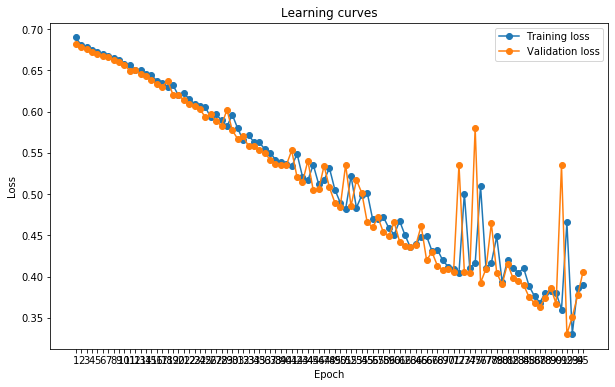

In [7]:
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, '-o', label='Training loss')
plt.plot(epochs, valid_losses, '-o', label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.show()